In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

In [8]:
df1 = pd.read_csv("C:\\Users\\kyoung\\OneDrive - RaceTrac\\Desktop\\GT-VIRT-DATA-PT-03-2022-U-LOL\\Homeworks\\05-Matplotlib\\Mouse_metadata.csv")
df2 = pd.read_csv("C:\\Users\\kyoung\\OneDrive - RaceTrac\\Desktop\\GT-VIRT-DATA-PT-03-2022-U-LOL\\Homeworks\\05-Matplotlib\\study_results.csv")

In [9]:
df1.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [10]:
df2.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [11]:
len(df1["Mouse ID"].value_counts())

249

In [12]:
mouse_study = pd.merge(df1, df2, on = "Mouse ID")

In [13]:
mouse_study.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [14]:
mouse_study.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [15]:
show_duplicates = mouse_study[mouse_study.duplicated(["Mouse ID", "Timepoint"])]
show_duplicates.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64

In [16]:
mouse_study_clean = mouse_study.drop_duplicates(subset = ["Mouse ID", "Timepoint"])

In [17]:
mouse_study_clean.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

In [18]:
drug_groups = mouse_study_clean.groupby(["Drug Regimen"])

In [19]:
Average_tv = round(drug_groups["Tumor Volume (mm3)"].mean(),2)
Median_tv = round(drug_groups["Tumor Volume (mm3)"].median(),2)
Variance_tv = round(drug_groups["Tumor Volume (mm3)"].var(),2)
Sdev_tv = round(drug_groups["Tumor Volume (mm3)"].std(),2)
SEM_tv = round(drug_groups["Tumor Volume (mm3)"].sem(),2)

In [20]:
Drug_summarydf_a = pd.DataFrame({ "Mean Tumor Volume":Average_tv, 
                                    "Median Tumor Volume": Median_tv, 
                                    "Variance Tumor Volume": Variance_tv, 
                                    "Standard Deviation Tumor Volume": Sdev_tv,
                                     "SEM Tumor Volume":SEM_tv
    
    
})

Drug_summarydf_a

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


<AxesSubplot:title={'center':'Total Measurements per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Total Mice'>

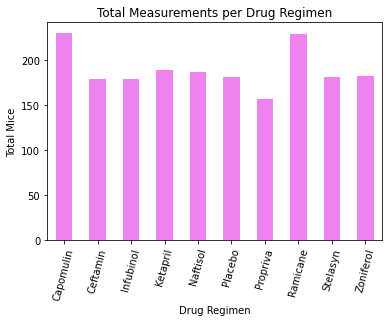

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_regimen_ct = drug_groups["Mouse ID"].count()
drug_pdplot = drug_regimen_ct.plot.bar( rot = 75, title = "Total Measurements per Drug Regimen", fontsize =10, color = "violet")
drug_pdplot.set_xlabel("Drug Regimen")
drug_pdplot.set_ylabel("Total Mice")
drug_pdplot

In [44]:
drug_regimen_ct.head(5)

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Total Mice')

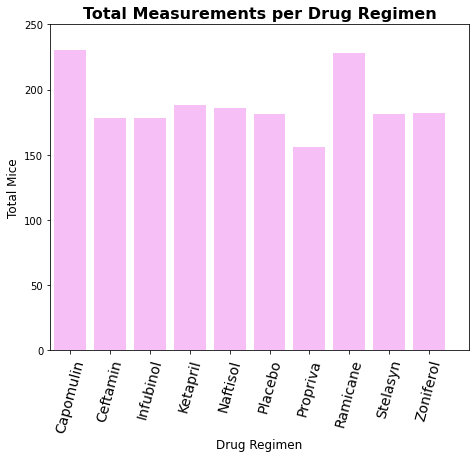

In [47]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot
# Set x axis and tick locations
x_axis = np.arange(len(drug_regimen_ct))
y_axis = drug_regimen_ct

#Make ticks 
tx = list(drug_regimen_ct.index.values)
tick_locations = [value for value in x_axis]

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(7.5,6))
plt.bar(x_axis, y_axis, color ='violet', alpha=0.5, align="center")
plt.xticks(tick_locations, tx, rotation="75", fontsize = 14)

# Set x and y limits
plt.xlim(-0.5, len(x_axis))
plt.ylim(0, 250)

# Set a Title and labels
plt.title("Total Measurements per Drug Regimen",fontsize=16, fontweight='bold')
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("Total Mice",fontsize=12)
#plt.autoscale(enable=True, axis='x', tight=True)
#plt.tight_layout()

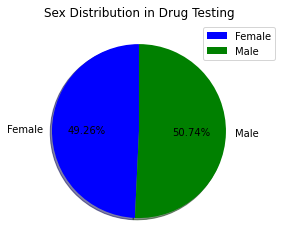

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Separate female and male mice 
mouse_sex = mouse_study_clean.groupby(["Sex"]).count()


# Create a pie chart based upon the trip duration of that single bike
mice_piepd = mouse_sex.plot(kind="pie", y='Mouse ID', title=("Sex Distribution in Drug Testing"),
                            colors = ["blue","green"],autopct = "%.2f%%", shadow = True,startangle=90)

#Put y label empty so it doesn't crach with Female
mice_piepd.set_ylabel("")

#Put label and adjust it with bbox_to_anchor so it is not on top of your graph
mice_piepd.legend(loc='upper right', frameon=True, bbox_to_anchor=(1.15, 1))

Male      958
Female    930
Name: Sex, dtype: int64

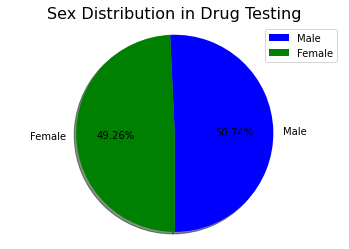

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex = mouse_study_clean["Sex"].value_counts()
#Create variables to use in pie chart 

explode = (0,0)
colors =["blue", "green"]
labels = list(mice_sex.index)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(mice_sex, explode=explode, labels=labels, colors = colors,
        autopct="%1.2f%%", shadow=True, startangle=270) 
 #Create axes which are equal so we have a perfect circle
plt.title("Sex Distribution in Drug Testing",fontsize=16)
plt.legend(labels, loc='upper right', frameon=True, bbox_to_anchor=(1, 1))
plt.axis("equal")
mice_sex

In [52]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint=mouse_study_clean.groupby(['Mouse ID'])['Timepoint'].max()
max_timepoint 

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [53]:
tx_df = pd.merge(max_timepoint , mouse_study_clean, on=(["Mouse ID","Timepoint"]))
tx_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [54]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_vol_data = []

for treatment in treatments:
    tx_regimen = tx_df.loc[tx_df["Drug Regimen"] == treatment]
    tumor_vol= tx_regimen['Tumor Volume (mm3)']
    
    tumor_vol_data.append(tumor_vol)

In [55]:
quartile0 = tumor_vol_data[0].quantile([.25,.5,.75])
lowerq0 = quartile0[0.25]
upperq0 = quartile0[0.75]
IQR0 = upperq0-lowerq0

quartile1 = tumor_vol_data[1].quantile([.25,.5,.75])
lowerq1 = quartile1[0.25]
upperq1 = quartile1[0.75]
IQR1 = upperq1-lowerq1

quartile2 = tumor_vol_data[2].quantile([.25,.5,.75])
lowerq2 = quartile2[0.25]
upperq2 = quartile2[0.75]
IQR2 = upperq2-lowerq2

quartile3 = tumor_vol_data[3].quantile([.25,.5,.75])
lowerq3 = quartile3[0.25]
upperq3 = quartile3[0.75]
IQR3 = upperq3-lowerq3
    
#Determine outliers using upper and lower bounds
lower_bound0 = lowerq0 - (1.5*IQR0)
upper_bound0 = upperq0 + (1.5*IQR0)

lower_bound1 = lowerq1 - (1.5*IQR1)
upper_bound1 = upperq1 + (1.5*IQR1)

lower_bound2 = lowerq2 - (1.5*IQR2)
upper_bound2 = upperq2 + (1.5*IQR2)

lower_bound3 = lowerq3 - (1.5*IQR3)
upper_bound3 = upperq3 + (1.5*IQR3)

In [56]:
print(f"For {treatments[0]} values below {lower_bound0} and above {upper_bound0} could be outliers")
print(f"For {treatments[1]} values below {lower_bound1} and above {upper_bound1} could be outliers")
print(f"For {treatments[2]} values below {lower_bound2} and above {upper_bound2} could be outliers")
print(f"For {treatments[3]} values below {lower_bound3} and above {upper_bound3} could be outliers")

For Capomulin values below 20.70456164999999 and above 51.83201549 could be outliers
For Ramicane values below 17.912664470000003 and above 54.30681135 could be outliers
For Infubinol values below 36.83290494999999 and above 82.74144559000001 could be outliers
For Ceftamin values below 25.355449580000002 and above 87.66645829999999 could be outliers


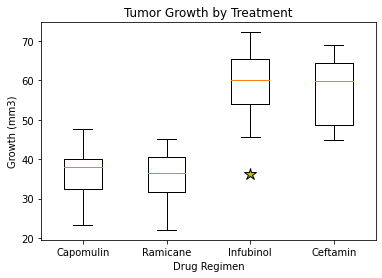

In [57]:
flierprops = dict(marker='*', markerfacecolor='y', markersize=12,
                  linestyle='none')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Growth by Treatment')
ax1.set_ylabel('Growth (mm3)')
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_vol_data, flierprops = flierprops, labels = treatments)
plt.show()

In [58]:
cap_mice = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin"]
cap_mice.value_counts("Mouse ID")

Mouse ID
b128    10
b742    10
x401    10
w914    10
v923    10
u364    10
t565    10
s710    10
s185    10
r944    10
r554    10
m957    10
m601    10
l897    10
l509    10
j119    10
i738    10
i557    10
g316    10
g288    10
y793    10
j246     8
f966     5
r157     4
w150     3
dtype: int64

In [63]:
Mouse_l509 = mouse_study_clean.loc[mouse_study_clean["Mouse ID"] == "l509"]

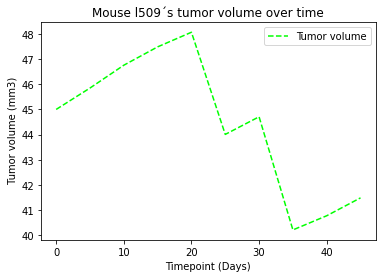

In [64]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Make variables to plot 
tumor_y = Mouse_l509["Tumor Volume (mm3)"]
time_x = Mouse_l509["Timepoint"]

# Plot our line that will be used to 
plt.plot(time_x, tumor_y, color="lime", label="Tumor volume", linestyle = "dashed")

# Place a legend on the chart in what matplotlib believes to be the "best" location
plt.legend(loc="best")

#Give titles and labels to graph
plt.title( "Mouse l509´s tumor volume over time")
plt.xlabel("Timepoint (Days)")
plt.xticks(np.arange(min(time_x), max(time_x)+1, 10))
plt.ylabel(" Tumor volume (mm3)")

# Print our chart to the screen
plt.show()

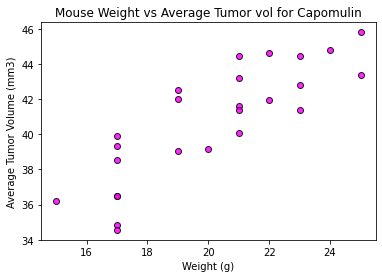

In [69]:
cap_df = mouse_study_clean.loc[mouse_study_clean['Drug Regimen'] == 'Capomulin'] 
# cap_df

cap_avg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'], facecolors = "magenta", edgecolors ="black", alpha = 0.85)
plt.title ('Mouse Weight vs Average Tumor vol for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

In [70]:
correlation = st.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


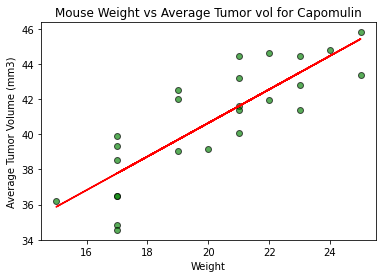

In [71]:
x_values = cap_avg['Weight (g)']
y_values = cap_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values,facecolors = "green", edgecolors ="black", alpha = 0.65)
plt.plot(x_values,regress_values,"r-")
plt.title ('Mouse Weight vs Average Tumor vol for Capomulin')
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()